In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## (a) Interesting patterns in the data

In [202]:
df = pd.read_csv('/Users/sunheepark/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')
df = df.sort_values(by = 'CRASH DATE').reset_index(drop = True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [203]:
df.shape

(1751743, 29)

In [204]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2013,2:43,BROOKLYN,11211,40.709552,-73.958859,"(40.7095517, -73.9588589)",SOUTH 5 STREET,HAVEMEYER STREET,NaN,...,Unspecified,NaN,NaN,NaN,195057,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,01/01/2013,14:00,BRONX,10467,40.871288,-73.880236,"(40.8712878, -73.8802357)",HULL AVENUE,EAST MOSHOLU PARKWAY NORTH,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,110621,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,01/01/2013,7:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2918880,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,01/01/2013,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89-00 VANWYCK EXPRESSWAY PRK LOT OF,...,Unspecified,NaN,NaN,NaN,205113,VAN,UNKNOWN,NaN,NaN,NaN
4,01/01/2013,2:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2867779,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [207]:
# remove rows which do not contain exact CRASH DATE
df = df.iloc[3:664073,:].reset_index(drop=True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664067 entries, 0 to 664066
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     664067 non-null  object 
 1   CRASH TIME                     664067 non-null  object 
 2   BOROUGH                        463977 non-null  object 
 3   ZIP CODE                       463891 non-null  object 
 4   LATITUDE                       577337 non-null  float64
 5   LONGITUDE                      577337 non-null  float64
 6   LOCATION                       577337 non-null  object 
 7   ON STREET NAME                 529886 non-null  object 
 8   CROSS STREET NAME              436470 non-null  object 
 9   OFF STREET NAME                99478 non-null   object 
 10  NUMBER OF PERSONS INJURED      664058 non-null  float64
 11  NUMBER OF PERSONS KILLED       664053 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED 

In [209]:
# convert object -> datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df = df.sort_values(by = 'CRASH DATE').reset_index(drop=True)

In [210]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2013-01-01,13:10,QUEENS,11421,40.686685,-73.853997,"(40.6866849, -73.8539966)",ATLANTIC AVENUE,88 STREET,NaN,...,Unspecified,NaN,NaN,NaN,205110,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1,2013-01-01,17:10,BRONX,10462,40.844681,-73.861186,"(40.8446813, -73.8611857)",MATTHEWS AVENUE,VANNEST AVENUE,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,103976,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
2,2013-01-01,1:15,MANHATTAN,10022,40.759308,-73.965293,"(40.759308, -73.9652931)",EAST 57 STREET,2 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,33768,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,2013-01-01,1:57,BROOKLYN,11225,40.659404,-73.950492,"(40.6594042, -73.9504919)",NOSTRAND AVENUE,RUTLAND ROAD,NaN,...,NaN,NaN,NaN,NaN,153379,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,2013-01-01,13:00,STATEN ISLAND,10312,40.540670,-74.187308,"(40.5406704, -74.187308)",HEENAN AVENUE,LAMONT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,302095,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN


In [212]:
pd.DataFrame(df['BOROUGH'].values).value_counts()#.drop_duplicate

BROOKLYN         145802
QUEENS           124301
MANHATTAN        106580
BRONX             67459
STATEN ISLAND     19835
dtype: int64

In [213]:
CRASH_TIME = df.groupby('CRASH DATE').count()['CRASH TIME']
CRASH_TIME

CRASH DATE
2013-01-01    375
2013-01-02    480
2013-01-03    549
2013-01-04    505
2013-01-05    389
             ... 
2021-01-26    245
2021-01-27    237
2021-01-28    227
2021-01-29    245
2021-01-30    221
Name: CRASH TIME, Length: 1231, dtype: int64

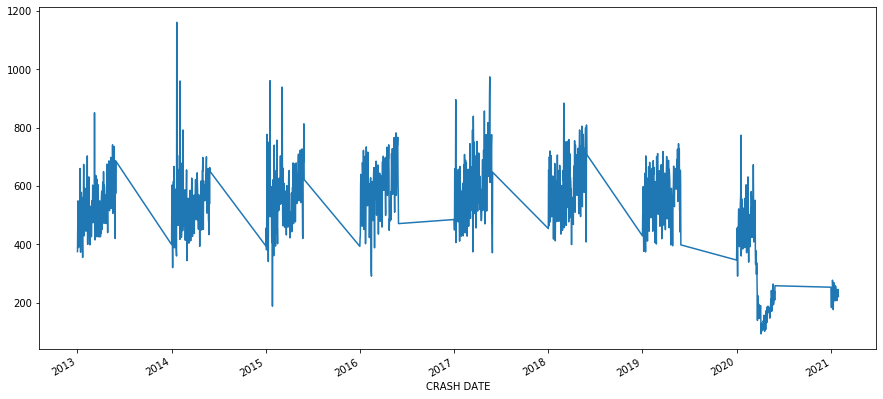

In [214]:
# Visualizing how many traffic accidents have occurred by date
plt.figure(figsize = (15,7))
CRASH_TIME.plot()
plt.show()

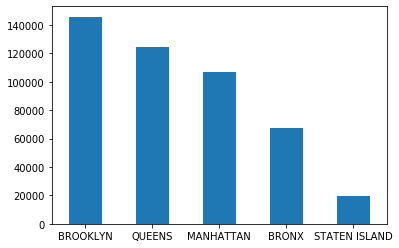

In [215]:
location_frequency = df['BOROUGH'].value_counts()
location_frequency.plot.bar(rot=0)

count    1231.000000
mean      539.453290
std       144.241281
min        93.000000
25%       477.000000
50%       559.000000
75%       630.000000
max      1161.000000
Name: CRASH TIME, dtype: float64


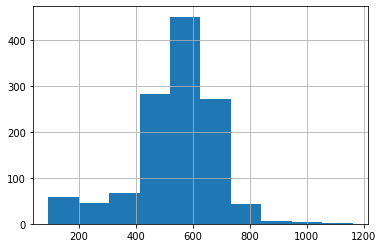

In [216]:
print(CRASH_TIME.describe())
CRASH_TIME.hist()

In [219]:
# mean value of crash per day is 539.4532900081235
CRASH_TIME.describe()['mean']

539.4532900081235

In [220]:
# Accident frequency by date which is more than mean values
more_than_mean = CRASH_TIME[CRASH_TIME.sort_values(ascending = False) > CRASH_TIME.describe()['mean']]
more_than_mean

CRASH DATE
2013-01-03    549
2013-01-10    555
2013-01-11    660
2013-01-14    542
2013-01-16    578
             ... 
2020-03-03    550
2020-03-04    540
2020-03-06    673
2020-03-09    545
2020-03-13    551
Name: CRASH TIME, Length: 705, dtype: int64

In [221]:
# Cases can be divided into 'ON STREET NAME' and 'OFF STREET NAME'
# Cases - 'ON STREET NAME' with 'CROSS STREET NAME'
df[['ON STREET NAME','CROSS STREET NAME']].value_counts()

ON STREET NAME                    CROSS STREET NAME               
FLATBUSH AVENUE                   GRAND ARMY PLAZA                    149
WEST 42 STREET                    8 AVENUE                            139
EAST 57 STREET                    3 AVENUE                            130
BRUCKNER BOULEVARD                EAST 138 STREET                     129
WEST FORDHAM ROAD                 MAJOR DEEGAN EXPRESSWAY             124
                                                                     ... 
EAST 58 STREET                    AVENUE M                              1
                                  AVENUE L                              1
                                  AVENUE K                              1
                                  AVENUE J                              1
EAST 3 STREET                     AVENUE D                              1
Length: 111823, dtype: int64

In [222]:
# Case - 'OFF STREET NAME' 
df['OFF STREET NAME'][df['OFF STREET NAME'].notnull()].value_counts()

772       EDGEWATER ROAD                    170
110-00    ROCKAWAY BOULEVARD                117
2800      VICTORY BOULEVARD                  87
BROADWAY                                     71
PARKING LOT 110-00 ROCKAWAY BOULEVARD        68
                                           ... 
371       VERMONT STREET                      1
219-39    91 ROAD                             1
474       GATES AVENUE                        1
2435      7 AVENUE                            1
1273      50 STREET                           1
Name: OFF STREET NAME, Length: 73099, dtype: int64

In [223]:
CONTRI_FACTORS = df[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']]
CONTRI_FACTORS

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
0,Unspecified,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,Unspecified,Unspecified,Unspecified
2,Unspecified,Unspecified,NaN,NaN,NaN
3,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
4,Unspecified,Unspecified,NaN,NaN,NaN
...,...,...,...,...,...
664062,Turning Improperly,Unspecified,NaN,NaN,NaN
664063,Unspecified,NaN,NaN,NaN,NaN
664064,Unspecified,Unspecified,NaN,NaN,NaN
664065,Driver Inattention/Distraction,Unspecified,Unspecified,Unspecified,NaN


In [224]:
# fill null values with 'Unspecified'
CONTRI_FACTORS.fillna({'CONTRIBUTING FACTOR VEHICLE 1':'Unspecified',
                       'CONTRIBUTING FACTOR VEHICLE 2':'Unspecified',
                      'CONTRIBUTING FACTOR VEHICLE 3':'Unspecified',
                      'CONTRIBUTING FACTOR VEHICLE 4':'Unspecified',
                      'CONTRIBUTING FACTOR VEHICLE 5':'Unspecified'}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [225]:
FACTOR1 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
FACTOR2 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()
FACTOR3 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()
FACTOR4 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()
FACTOR5 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

## (b) Visualize Results

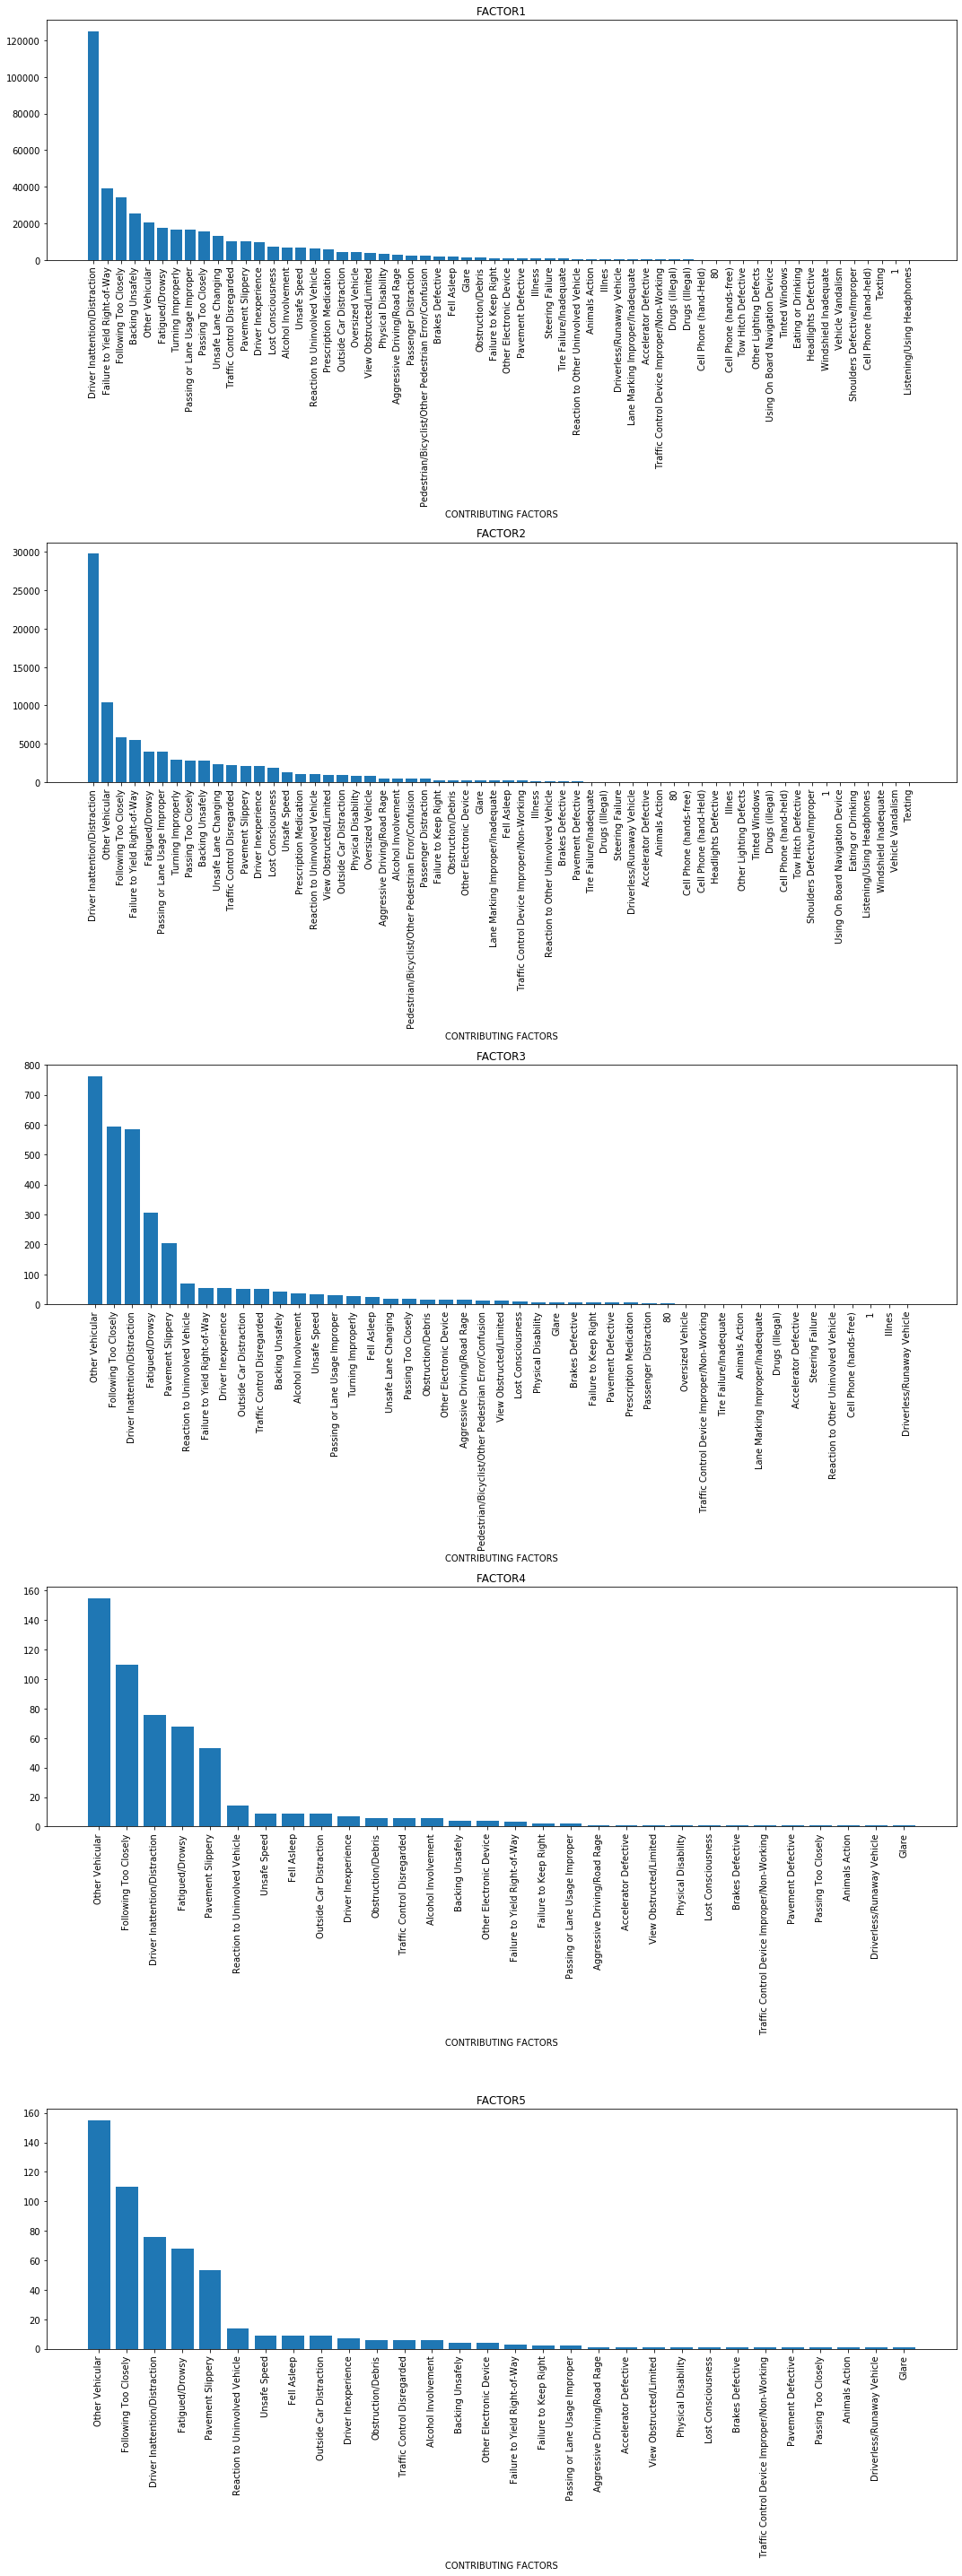

In [226]:
fig = plt.figure(figsize = (15,40))

ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)


# ax1
ax1.bar(FACTOR1.drop(['Unspecified']).index, FACTOR1.drop(['Unspecified']).values)
# ax2
ax2.bar(FACTOR2.drop(['Unspecified']).index, FACTOR2.drop(['Unspecified']).values)
# ax3
ax3.bar(FACTOR3.drop(['Unspecified']).index, FACTOR3.drop(['Unspecified']).values)
# ax4
ax4.bar(FACTOR4.drop(['Unspecified']).index, FACTOR4.drop(['Unspecified']).values)
# ax5
ax5.bar(FACTOR4.drop(['Unspecified']).index, FACTOR4.drop(['Unspecified']).values)

# set titles
ax1.set_title('FACTOR1')
ax2.set_title('FACTOR2')
ax4.set_title('FACTOR4')
ax5.set_title('FACTOR5')
ax3.set_title('FACTOR3')

# set x-axis label
ax1.set_xlabel('CONTRIBUTING FACTORS')
ax2.set_xlabel('CONTRIBUTING FACTORS')
ax4.set_xlabel('CONTRIBUTING FACTORS')
ax5.set_xlabel('CONTRIBUTING FACTORS')
ax3.set_xlabel('CONTRIBUTING FACTORS')

# rotate x-axis 
ax1.tick_params (axis = 'x', labelrotation = 90)
ax2.tick_params (axis = 'x', labelrotation = 90)
ax4.tick_params (axis = 'x', labelrotation = 90)
ax5.tick_params (axis = 'x', labelrotation = 90)
ax3.tick_params (axis = 'x', labelrotation = 90)

plt.tight_layout()
plt.show()

## (c) Write one paragraph summarizing the results

From Visualization of 'how many traffic accidents have occurred by date', it seems like that most traffic accidents have happened from the start of the year to about June-July. From the mid of the year, cases keep decreased. Among the five boroughes (BROOKLYN , QUEENS, MANHATTAN, BRONX, STATEN ISLAND) BROOKLYN, QUEENS and MANHATTAN shows high records compared with BRONX and STATEN ISLAND. Especially, BROOKLYN(145,790) shows about 7.3 times of traffic accidents in STATEN ISLAND(19,844). According to data, most traffic accidents have happened in FLATBUSH AVENUE GRAND ARMY PLAZA(Flatbush Ave, Brooklyn, NY 11238) when data is arranged with 'ON STREET NAME','CROSS STREET NAME’ columns. When traffic accidents data is arranged with 'OFF STREET NAME’, the most cases have happend in 772 Edgewater Rd, The Bronx, NY 10474. About contributing factors, there are five factors what affect traffic accidents. From factor 1 to factor 5, 'Drivier Inattention/Distraction' seems like the main factor. In factor 1 and 2, Drivier Inattention/Distraction is top-ranked. In factor 3,4 and 5, Drivier Inattention/Distraction is also ranked as 3rd main factor of traffic accidents. 

## (d) The NYC City Council proposes a ban on cellphone use by taxi drivers. Will this measure meaningfully reduce accidents and/or fatalities?

### There are three options related with Cell Phone - __Cell Phone (hands-free)/Cell Phone (hand-Held)/Cell Phone (hand-held)__

In [227]:
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hands-free)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-Held)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-held)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))

print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hands-free)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hand-Held)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hand-held)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))

print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hands-free)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-Held)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-held)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))

print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hands-free)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hand-Held)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hand-held)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))

5
6
0
1
2
0
1
1
0
0
2
0


### According to the several results with 'Taxi' and 'Cell Phone', there are just a few cases of traffic accidents. It means if NYC City Council proposes a ban on cellphone use by taxi drivers, __it will not meaningfully reduce accidents__.